# Tensorflow 2.0
- Eager execution mode: skip all the Graph and Session (now, becomes much like a simple Python code (numpy code).
- Tensors 1.0
  - Graph: relate the nodes you created
  - Session:class for performing computation on a graph

In [ ]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

x = tf.random.normal(shape=(3,3))
y = tf.random.normal(shape=(3,3))
z = tf.ones(shape=(1))

result = z + x * y
print(result)

tf.Tensor(
[[0.42300504 1.5138938  1.0883104 ]
 [2.1952374  2.9931147  0.18550509]
 [1.2978332  0.7032233  0.8444773 ]], shape=(3, 3), dtype=float32)


## Linear Regression using Tensorflow 2.0

    0|    3.0029|    0.8013|191.921646
   10|    3.9568|     1.755|154.803024
   20|    4.7868|     2.607|125.907997
   30|    5.5089|      3.37|103.397346
   40|    6.1367|     4.053| 85.846344
   50|    6.6825|     4.664| 72.150848
   60|    7.1567|     5.211| 61.454578
   70|    7.5686|     5.701| 53.093197
   80|    7.9262|     6.141| 46.550900
   90|    8.2365|     6.534| 41.426979
  100|    8.5058|     6.887| 37.409897
  110|    8.7392|     7.203| 34.257305
  120|    8.9414|     7.487| 31.780540
  130|    9.1166|     7.742| 29.832596
  140|    9.2682|     7.971| 28.298861
  150|    9.3994|     8.176| 27.089880
  160|    9.5127|      8.36| 26.135777
  170|    9.6107|     8.526| 25.381931
  180|    9.6952|     8.674| 24.785589
  190|    9.7681|     8.808| 24.313271
  200|    9.8310|     8.928| 23.938726
  210|    9.8851|     9.036| 23.641350
  220|    9.9316|     9.133| 23.404949
  230|    9.9716|     9.221| 23.216778
  240|   10.0059|     9.299| 23.066818
  250|   10.0353|      9.

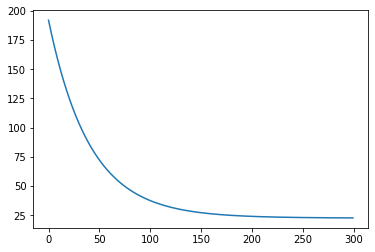

In [ ]:
np.random.seed(17) 
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=20, b=10 ???
y = y + np.random.randn(n) * 5       # add noise

W = tf.Variable(2.9)
b = tf.Variable(0.7)

learning_rate = 0.01
lossHistory = []

for i in range(300):
    y_pred = W * x + b
    cost = tf.reduce_mean(tf.square(y_pred - y))

    W_grad = tf.reduce_mean((y_pred - y) * x)
    b_grad = tf.reduce_mean(y_pred - y)
    
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    lossHistory.append(cost)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

## Linear Regression using Tensorflow 2.0 (2)
- using tf.GradientTape() for gradient values

    0|    3.1058|    0.9027|191.921646
   10|    4.8755|     2.697|125.586945
   20|    6.2120|     4.132| 85.459198
   30|    7.2198|      5.28| 61.103466
   40|    7.9785|     6.201| 46.266964
   50|    8.5488|     6.939| 37.193863
   60|    8.9765|     7.532| 31.622187
   70|    9.2966|     8.009| 28.185572
   80|    9.5356|     8.392| 26.056047
   90|    9.7135|     8.702| 24.730110
  100|    9.8455|     8.952| 23.900427
  110|    9.9431|     9.153| 23.378635
  120|   10.0149|     9.316| 23.048809
  130|   10.0675|     9.448| 22.839252
  140|   10.1058|     9.555| 22.705442
  150|   10.1335|     9.642| 22.619577
  160|   10.1533|     9.712| 22.564215
  170|   10.1674|     9.769| 22.528349
  180|   10.1773|     9.815| 22.505022
  190|   10.1840|     9.853| 22.489779
  200|   10.1886|     9.884| 22.479782
  210|   10.1916|     9.909| 22.473204
  220|   10.1934|     9.929| 22.468861
  230|   10.1945|     9.946| 22.465981
  240|   10.1950|      9.96| 22.464069
  250|   10.1951|     9.9

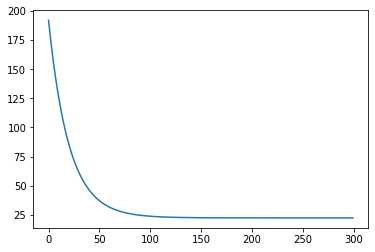

In [ ]:

np.random.seed(17) 
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=20, b=10 ???
y = y + np.random.randn(n) * 5       # add noise

W = tf.Variable(2.9)
b = tf.Variable(0.7)

learning_rate = 0.01
lossHistory = []

for i in range(300):
    with tf.GradientTape() as tape:
        # 값들의 변화를 저장해놓음
        # PyTorch의 loss.backward()
        # 나중에 optimizer.step() 하면 다 돌아가는 것이랑 똑같음
        y_pred = W * x + b
        cost = tf.reduce_mean(tf.square(y_pred - y))
    
    W_grad, b_grad = tape.gradient(cost, [W,b])  # dCost/dw, dCost/db
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    lossHistory.append(cost)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

## Linear regression using keras

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[10.176245]], dtype=float32), array([10.112108], dtype=float32)]


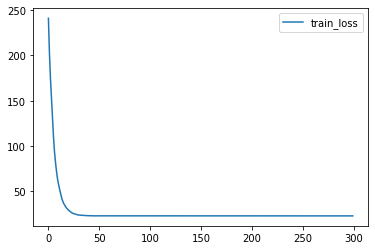

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import SGD

np.random.seed(17) 
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=20, b=10 ???
y = y + np.random.randn(n) * 5       # add noise
  
# n = len(x) # Number of data points
# plt.scatter(x, y) 
# plt.xlabel('x') 
# plt.xlabel('y') 
# plt.title("Training Data") 
# plt.show() 

#---------
model = Sequential()

model.add(Dense(1, input_shape=(1,), activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')
history = model.fit(x, y, epochs=300, verbose=0)


print([i.numpy() for i in model.weights])
# history.history.keys()
plt.plot(history.history['loss'], label='train_loss')
plt.legend(loc='best')

## Logistic regression

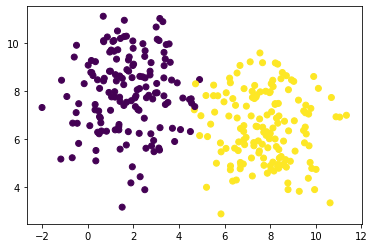

In [ ]:
from sklearn.datasets import make_blobs

np.random.seed(17)
N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, 
                    cluster_std=1.5, random_state=20)
plt.scatter(X[:,0], X[:,1], c=y)


In [ ]:
model = Sequential()

model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, y, epochs=100, verbose=0)

print([i.numpy() for i in model.weights])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[array([[ 0.9811286],
       [-0.6085097]], dtype=float32), array([-0.07413111], dtype=float32)]


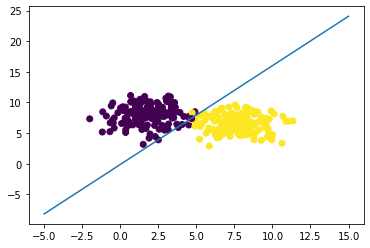

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
w1, w2 = model.weights[0][0], model.weights[0][1]
b = model.weights[1]
xx = np.linspace(-5, 15, 100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)

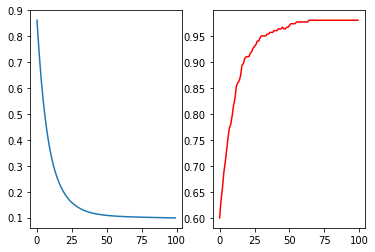

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy', c='r')
plt.show()

# Tf1.0 and Tf 2.0 비교


### 1. Eager execution (no Graph, no Session)
 - direct execution
 - no placeholder(), no gloval_variables_initializer()

In [ ]:
a = tf.constant(10)
b = tf.constant(20)
c = a + b
print(c, c.numpy())

tf.Tensor(30, shape=(), dtype=int32) 30


In [ ]:
w = tf.Variable(tf.random.normal([1]))
print(w)

for step in range(3):
    w = w + 1.0
    print(w.numpy())

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-2.4748366], dtype=float32)>
[-1.4748366]
[-0.4748366]
[0.5251634]


In [ ]:
a = tf.constant(1.0)   # function 에 직접 값을 넘겨줄 수 있음.
b = tf.constant(3.0)

def tensor_sum(x, y):
    return x + y

result = tensor_sum(a, b)

print(type(result), result, result.numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(4.0, shape=(), dtype=float32) 4.0


### 2. high level API (keras)
- model, layers
- data generation (train, test)
- CNN, RNN, LSTM, GRU, ... 
- model generation -> compile -> fit -> evaluate/predict -> save (or reload)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
model = Sequential()

model.add(Flatten(input_shape=(1,)))
model.add(Dense(2, activation='sigmoid'))
# or
# model.add(Dense(2, activation='sigmoid'), input_shape=(1,)) # more common
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import SGD, Adam
# regression
model.compile(optimizer=SGD(learning_rate=0.1), 
              loss='mse',
              metrics=['accuracy'])    # loss 는 기본
# classification
model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy')

In [ ]:
'''
model.fit(x_train, y_train, epochs=10, 
          batxh_size=100,
          verbose=0,
          validation_split=0.2)
'''

In [ ]:
'''
model.evaluate(x_test, y_test, epochs=10, batch_size=10)
model.predict(x_input_data, batch_size=100)
'''

In [ ]:
'''
model.save("model_name.h5")
# and later
model = load_model("model_name.h5")
'''

#### input_shape and input_dim
- Input shape: simply tells the input layer what the shape of one sample looks like. Adding it to your input layer, will ensure that a match is made.

- Input dim: sometimes, though, you just have one dimension – which is the case with one-dimensional / flattened arrays, for example. In this case, you can also simply use input_dim: specifying the number of elements within that first dimension only.

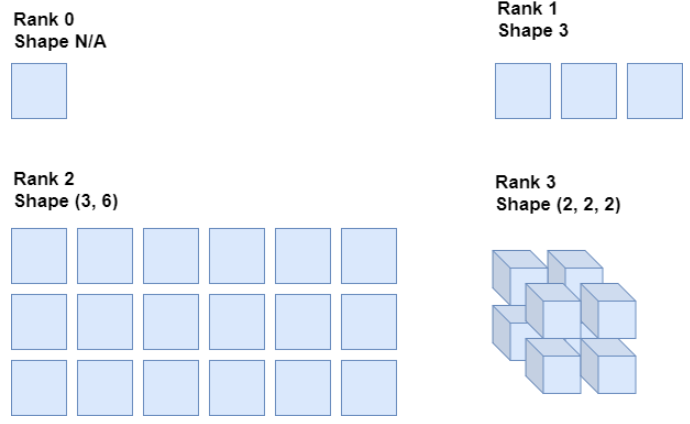

# 연습
- GradientTape(): 
  - trainable variables (created by tf.Variable or tf.compat.v1.get_variable, where trainable=True is default in both cases) are automatically watched. Tensors can be manually watched by invoking the watch method on this context manager.
  - By default GradientTape will automatically watch any trainable variables that are accessed inside the context
- 

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = x * x
    z = y * y

dz_dx = g.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = g.gradient(y, x)  # 6.0
# del g  # Drop the reference to the tape

dz_dx, dy_dx


(<tf.Tensor: shape=(), dtype=float32, numpy=108.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)